In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
my_data=np.loadtxt('ex1data1.txt',delimiter=',')

In [4]:
x=my_data[:,0]
y=my_data[:,1]
m=my_data.shape[0]

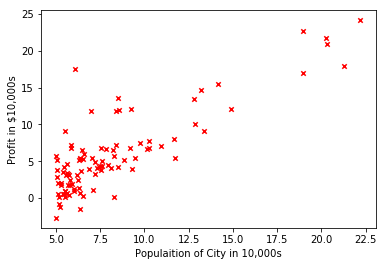

In [5]:
plt.scatter(x,y,color='r',marker='x',s=20)
plt.xlabel('Populaition of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [6]:
def compute_cost(X,theta):
    res=np.dot(X,theta)-my_data[:,1,np.newaxis] 
#   direct extract column from my_data without np.newaxis arg loses dimension information  
    return (res**2).sum()/(2*X.shape[0])

In [11]:
# gradient descent
X=np.column_stack((np.ones((m,1)),my_data[:,0]))
theta=np.zeros((2,1))
iterations=1500
alpha=0.01
J=[]
for i in range(iterations):
    MSE_h=compute_cost(X,theta)
    J.append(MSE_h)
    tmp=(np.dot(X,theta)-my_data[:,1,np.newaxis])
    theta[0]=theta[0]-alpha*(1/m)*tmp.sum()
    theta[1]=theta[1]-alpha*(1/m)*(tmp*my_data[:,0,np.newaxis]).sum()
    

(0, 20)

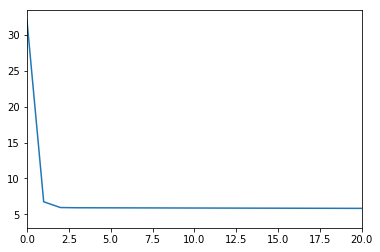

In [14]:
plt.plot(J)
plt.xlim([0,20])

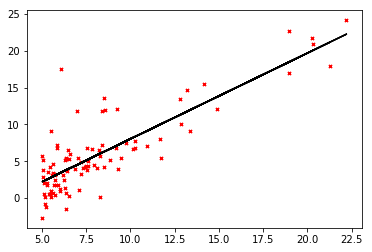

In [18]:
plt.scatter(x,y,marker='x',color='r',s=10)
l=x*theta[1]+theta[0]
plt.plot(x,l,'k-')

In [23]:
a=np.linspace(-10,10,50)
b=np.linspace(1,4,50)
cont=np.zeros((50,50))
for i in range(50):
    for j in range(50):
        theta=np.array([[a[i]],[b[j]]])
        cont[i,j]=compute_cost(X,theta)

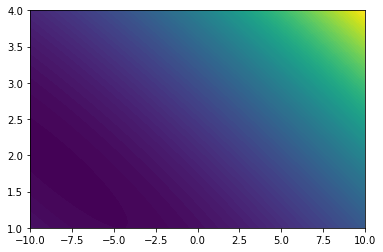

In [36]:
plt.contourf(a,b,cont,100)